Linear Regression
=========

# Problem 1

* [Problem Description](#problem_description)
* [Solution 1: Analytical solution with Least Squares Error minimization](#least-squares-error-minimization)
* [Solution 2: Applying Gradient Descent (Keras)](#gradient_descent_keras)
* [Solution 3: Applying Gradient Descent (Tensorflow)](#gradient_descent_tensorflow)

In this problem we will find the best line that fits a given model. For theory details, please see [Linear Regression Theory](Linear_Regression_Theory.ipynb).

<a id='problem_description'></a>
### Problem Description

Consider we have a set of data representing the height (in meters) and weight (in kg) of 15 people:

In [1]:
height = [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83]
weight = [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]

Suppose our height is our **dependent variable** and the weight is our **independent variable** Let's plot them:

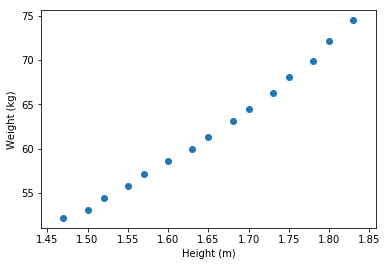

In [2]:
import matplotlib.pyplot as plt

plt.scatter(height, weight)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

As we can see, there is a positive correlation between the height and the weight of these people and we could approximate our data with a model represented by a straight line. There are many applications for approximating our points by a line, for example:
* Instead of storing all these points, we could save memory keeping only the parameters of a straight line.
* With a straight line we could predict the weight of someone given his/her height. 

In this notebook we will find the best fitting line using different approaches that are described in following sections.

<a id='least-squares-error-minimization'></a>
### Solution 1: Least Squares Error minimization

As already demonstrated in [Linear Regression Theory](Linear_Regression_Theory.ipynb), the line that best fits our model is given by:

$$\begin{align*} 
\boxed{y = \beta_0 + \beta_1 x \text{ , where }
            \left\{
                \begin{array}{ll}
                  \beta_0 = \bar{y} - \beta_1\bar{x}\\
                  \beta_1 = \frac{\sum_{i=1}^N \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i=1}^N \left(x_i - \bar{x}\right)^2}
                \end{array}\right.}
\end{align*} $$

Let's get a little help from NumPy to find $\beta_0$ and $\beta_1$.

In [3]:
import numpy as np

# Defining x and y
x = height
y = weight
# Finding y and x means
y_mean = np.mean(y)
x_mean = np.mean(x)
# Finding beta_1 and beta_0
beta_1 = np.sum((x-x_mean)*(y-y_mean))/np.sum(np.square(x-x_mean))
beta_0 = y_mean - (beta_1*x_mean)
print("beta_0: %s" % beta_0)
print("beta_1: %s " % beta_1)

beta_0: -39.0619559188
beta_1: 61.2721865421 


The equation of our line is: $$y = -39.0619 + 61.2721 x$$

Let's plot our line:

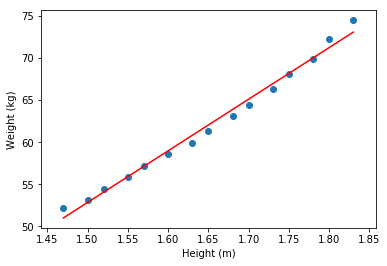

In [4]:
# Finding the extreme y coordinates for our line
y_min = beta_0 + (beta_1*np.min(x))
y_max = beta_0 + (beta_1*np.max(x))

plt.scatter(x, y)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.plot([np.min(x),np.max(x)], [y_min,y_max],c='r')
plt.show()

<a id='error_lr'></a>
As we can see in the graph above that the line seems to be a good model to representation of our data.

You may wonder how much error (loss) we have in this model. So, let's calculate the total error using the equation [2] from [Linear Regression Theory](Linear_Regression_Theory.ipynb):

$$E = \sum_{i=1}^N (e_i)^2 = \sum_{i=1}^N (y_i-f(x_i, \beta))^2$$

In [5]:
error = np.sum(np.square(y - (beta_0 + np.multiply(beta_1,x))))
print("Error: %s" % error)

Error: 7.49055840388


As our line is the **best fitting line**, this is the minimal possible error.

<a id='gradient_descent_keras'> </a>
### Solution 2: Applying Gradient Descent (Keras)

We could see linear regression as a 1-layer neural network with a **linear activation function ($\sigma$)**.
<img src='figures/lr_with_activation.png'>

In this solution we will be using [Tensorflow](https://www.tensorflow.org) with [Keras](https://keras.io/).

So, let's create our single-neuron model: 

In [6]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Cleaning sessions previously started
keras.backend.clear_session()
# Creating our model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear', kernel_initializer='zero'))
# Using Gradient Descent as optimizer
# Obs: When the batch size is equal to the amount of samples, Stochastic Gradient Descent becomes Batch Gradient Descent
sgd = SGD(lr=0.2)
# Adding the Mean Squared Error loss function and Gradient Descent optimizer to our model
model.compile(optimizer=sgd, loss='mean_squared_error')

Using TensorFlow backend.


Once our model is created, let's train using the model.fit() function:

In [7]:
# As we have only one sample and the gradient is updated after every batch passing through the neuron, 
# let's make our batch longer to avoid having the weights (betas) updated very often.
batch_size = 50
epochs = 1000
# Train our model silently (verbose=0)
result = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=0)

Plotting our loss to see how it dropped along the training:

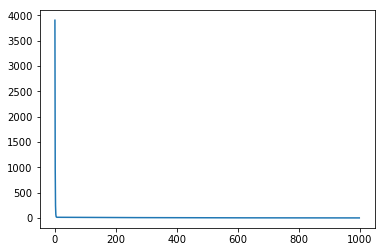

In [8]:
plt.plot(result.history["loss"])
plt.show()

Let's measure our final loss, get the weights ($\beta_0$ and $\beta_1$) and plot our line:

Mean Squared Eror: 1.51488804817
beta_0: [-23.9581356]
beta_1: [ 52.15190506] 


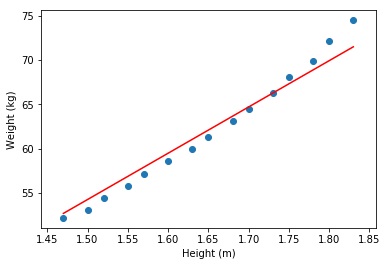

In [9]:
# Measure loss
loss = model.evaluate(x, y, verbose = 0)
print('Mean Squared Eror: %s' % loss)
# Get beta_0 and beta_1
[beta_1, beta_0] = model.get_weights()
beta_1 = beta_1[0] #Keras returns our beta_1 as a vector
print("beta_0: %s" % beta_0)
print("beta_1: %s " % beta_1)
# Plotting
y_min = beta_0 + (beta_1*np.min(x))
y_max = beta_0 + (beta_1*np.max(x))
plt.scatter(x, y)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.plot([np.min(x),np.max(x)], [y_min,y_max],c='r')
plt.show()

Note that the loss now is different than the loss we calculated minimizing our [Least Squares Error](#error_lr). The reason is that the loss we obtained from Keras is the **Mean Squared Error**, a different than **Least Squares Error**.<p>
Below let's calculate our Least Squared Error based on the results obtained with Keras:

In [10]:
lse = np.sum(np.square(y - (beta_0 + np.multiply(beta_1,x))))
print('Least Squares Eror: %s' % lse)

Least Squares Eror: 22.7233261836


Try to play with different epochs and see how our line parameters ($\beta_0$ and $\beta_1$) will improve as long as we increase the number of epochs.<p>
If we train with 10000 epochs and 50 samples per batch, we will obtain $\beta_0=-39.06036377$, $\beta_1=61.27122498$ and least squares error= 7.49055857317, very similar values to ones we previously calculated, whose values were $\beta_0=-39.0619559188$ and $\beta_1=61.2721865421$.

<a id='gradient_descent_tensorflow'> </a>
### Solution 3: Applying Gradient Descent (Tensorflow)

I usually use tensorflow with keras. Tensorflow is a library that can be used behind Keras. 

Programming with tensorflow can be a paradigm change for some people. First we need to create a **graph** and run it later. One of the biggest advantages of using tensorflow is it easiness to use parallel computing, making it an easy tool to develop deep learning models efficiently in both CPUs and GPUs.

Let's start importing the needed packages:

In [11]:
import tensorflow as tf
# This is a .py file to with useful functions
from utils import show_graph
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import numpy.random as rand
# To enable reproducibility
rand.seed(26051984)

Defining our graph:

In [12]:
tf.reset_default_graph()

# Defining variables that will be updated during training
betas = tf.Variable(np.zeros((2,1), np.float64)) # initializing beta_0 as 0 and beta_1 as 0
Xb = np.hstack([np.ones(shape=(15,1)), np.reshape(height, (15,1))])
Yb = np.reshape(weight,(15,1))
# x (input) is constant (it will never be changed)
x_const = tf.constant(Xb)
# y (expected output) is also a constant
y_const = tf.constant(Yb)
# Defining our output
output = tf.matmul(x_const,betas)
error = output-y_const
mse = tf.reduce_mean(tf.square(error))
lse = tf.reduce_sum(tf.square(error))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(mse)

Now let's execute our graph and plot our results:

In [13]:
num_epochs = 1000
learning_rate = 0.2

# Creating our session
with tf.Session() as session:
    # Initializing our variables
    session.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        # Run our graph
        out = session.run(optimizer)
        best_betas = betas.eval()
        # Calculate error every 1000 epochs
        if epoch % 1000 == 0:
            print("Epoch %s MSE = %s LSE = %s" %(epoch, mse.eval(), lse.eval()))

            # Getting beta 0 and beta 1
beta_0 = best_betas[0]
beta_1 = best_betas[1]
# Printing results
print("beta_0: %s" % beta_0)
print("beta_1: %s " % beta_1)

Epoch 0 MSE = 263.566337095 LSE = 3953.49505642
beta_0: [-10.04116809]
beta_1: [ 43.74828619] 


Plotting results:

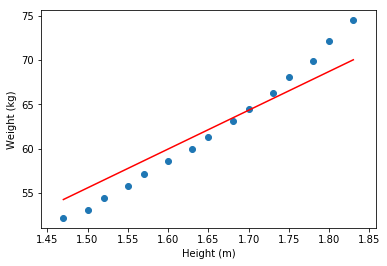

In [14]:
# Plotting
x
y_min = beta_0 + (beta_1*np.min(x))
y_max = beta_0 + (beta_1*np.max(x))
plt.scatter(x, y)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.plot([np.min(x),np.max(x)], [y_min,y_max],c='r')
plt.show()

I encourage you to increase the number of epochs and see that the more we train, the lower the error gets and the closer to our calculated line it becomes.
Note that if we train with 10000 epochs, we will obtain $\beta_0=-38.98034092$, $\beta_1=61.22290417$ and least squares error= 7.49106519944, which are similar values to our best fitting line.